In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import random

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [7]:
out_folder = '211205_rank_based_feature_illustration_human'
in_folder = '190428_predict_gtex_with_mirnas'

In [8]:
save_images = True
# save_late_images = True

In [9]:
from narrative import nar181026_heat_confidence_genes

In [10]:
ref_genes = standardizer.reference_genes(9606, 'orp')  # only consider supported protein coding-genes

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [11]:
from access_aging_data import companions

In [12]:
all_de = companions.tstoeger_190427_gtex()
all_de = all_de[
    (all_de['younger'].isin([2, 3])) &
    (all_de['older'].isin([4, 5, 6, 7]))
]

all_de.loc[:, 'significant'] = all_de['padj'] < 0.05
all_de.loc[:, 'reduced_tissue'] = all_de['tissue'].str.replace(
    ' - ', '_').str.replace(' ', '_').str.replace(
    '-', '_').str.replace('(','').str.replace(')', '')

all_de.loc[:, 'condition'] = all_de.loc[:, 'gender'] + 's_' + all_de['reduced_tissue'] + '_' + \
    all_de['older'].astype(int).astype(str) + '_vs_' + all_de['younger'].astype(int).astype(str)

all_de = all_de[all_de['gene_ncbi'].isin(ref_genes)]

In [13]:
all_de

,gene_ncbi,o_over_y,pvalue,padj,tissue,younger,older,gender,significant,reduced_tissue,condition
22069,5266,0.748881,1.138487e-01,3.649429e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22070,2070,1.833579,2.629287e-15,3.106635e-11,Adipose - Subcutaneous,2.0,4.0,male,True,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22071,1149,-0.571809,7.038488e-02,2.831571e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22072,440295,-1.631328,3.679263e-02,NaN,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22073,4327,0.073817,7.597794e-01,8.978201e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
...,...,...,...,...,...,...,...,...,...,...,...
24769584,55894,-0.158972,9.687092e-01,NaN,Whole Blood,3.0,6.0,female,False,Whole_Blood,females_Whole_Blood_6_vs_3
24769602,245928,0.220502,9.566085e-01,NaN,Whole Blood,3.0,6.0,female,False,Whole_Blood,females_Whole_Blood_6_vs_3
24769609,729201,-0.100088,9.802965e-01,NaN,Whole Blood,3.0,6.0,female,False,Whole_Blood,females_Whole_Blood_6_vs_3
24769620,493901,0.161617,9.681888e-01,NaN,Whole Blood,3.0,6.0,female,False,Whole_Blood,females_Whole_Blood_6_vs_3


In [14]:
# all_de, detection, mice_in_comparisons, triplicate_series = nar181026_heat_confidence_genes.load_detection(
#     detection_column='padj')

# tissues_to_consider = ['BAT', 'Blood', 'GutEP', 'MuscSat', 'Adrenal', 'Kidney',
#        'Heart', 'Liver', 'Skin', 'Stomach', 'Brain', 'SI',
#        'LI', 'Cerebellum', 'WAT', 'Esophagus', 'Lung'] 
# pfus=[0]

In [15]:
# all_de = all_de[
#     (all_de['younger'] == 4) & 
#     (all_de['is_detected'] == True) &
#     (all_de['de_unit'] == 'both') &
#     (all_de['tissue'].isin(tissues_to_consider)) &
#     (all_de['pfu'].isin(pfus)) & 
#     (all_de['gene_ncbi'].isin(ref_genes))
# ]
# all_de['significant'] = all_de['padj'] < 0.05

In [16]:
# sign = all_de[['condition', 'significant']].groupby('condition').agg(sum)





# agg = []

# for condition in all_de['condition'].unique():

#     p = export.get_material_path(
#         '{}/predictions_{}.csv'.format(in_folder, condition))
#     if os.path.exists(p):
#         agg.append(pd.read_csv(p))


# df = pd.concat(agg).rename(columns={'Unnamed: 0': 'condition'}).set_index('condition')
# df['mean'] = df.mean(1)
# d = pd.merge(sign.reset_index(), df[['mean']].reset_index())
# f = d['significant'] > 0
# d.loc[f, 'log_significant'] = d.loc[f, 'significant'].apply(lambda x: np.log10(x))

# zeros = sum(~f)

# h = []
# for j in range(zeros):
#     h.append(-1 + random.randrange(0, 10)/20)
# d.loc[~f, 'log_significant'] = h

# f = d['condition'].str.contains('_0_4_[0-9]*$')
# d = d[f]

# d = pd.merge(d, all_de[['condition', 'younger', 'older']].drop_duplicates())

In [17]:
agg = []

for condition in all_de['condition'].unique():

    p = export.get_material_path(
        '{}/features_{}.csv'.format(in_folder, condition))

    if os.path.exists(p):
        h = pd.read_csv(p).set_index('feature')
        h = h.mean(1).to_frame('contribution').rename_axis('feature').reset_index()
        h.loc[:, 'condition'] = condition
        agg.append(h)



u = pd.concat(agg)

In [18]:
pi = u.pivot(index='condition', columns='feature', values='contribution')

In [19]:
(pi.rank(axis='columns', ascending=False)<=10).sum().sort_values().tail(20)

feature
tf_PPARG                68
tf_SPI1                 78
tf_MYCN                 79
tf_KDM5A                98
gene_CG                112
transcripts_ensembl    131
exons_max_ensembl      133
tf_E2F1                136
tf_NEUROD1             158
tf_BCL3                161
gene_T                 171
gene_C                 238
gene_G                 241
gene_A                 293
rna_cds_SumACGT        309
miRNA_total            360
rna_full_SumACGT       403
rna_full_CG            458
tf_different_tfs       477
gene_SumACGT           515
dtype: int64

In [20]:
ranks = pi.rank(axis='columns', ascending=False)

In [21]:
(ranks['tf_different_tfs']==1).sum()

65

In [22]:
# ranks.loc['Heart_0_4_18', :].sort_values()

In [23]:
ranks.loc[:, [x for x in ranks.columns if x.startswith('tf')]].drop(columns=['tf_different_tfs']).median(0).sort_values()

feature
tf_E2F1         28.0
tf_NEUROD1      28.0
tf_BCL3         33.0
tf_JARID2       36.0
tf_KDM5A        45.0
               ...  
tf_MEIS2      1800.0
tf_ZNF224     1800.0
tf_HNF1B      1800.0
tf_ZNF148     1800.0
tf_ZNF250     1800.0
Length: 437, dtype: float64

In [24]:
u = ranks.loc[:, [x for x in ranks.columns if x.startswith('tf')]].drop(columns=['tf_different_tfs'])

In [25]:
(u<10).sum().sort_values().tail(20)

feature
tf_SIX5        26
tf_TAF1        30
tf_TBP         31
tf_HNF4A       34
tf_OTX2        34
tf_ZFX         37
tf_JARID2      41
tf_SMAD5       43
tf_JUN         44
tf_STAT1       45
tf_STAT5B      47
tf_KMT2B       48
tf_KLF5        51
tf_PPARG       59
tf_SPI1        71
tf_MYCN        76
tf_KDM5A       82
tf_E2F1       122
tf_NEUROD1    145
tf_BCL3       150
dtype: int64

In [26]:
# ranks.loc[:, [x for x in ranks.columns if x.startswith('tf')]].drop(columns=['tf_different_tfs']).min(1).to_frame('best_tf')

In [27]:
# ranks.loc[:, [x for x in ranks.columns if x.startswith('miRNA')]].drop(columns=['miRNA_total']).min(1).to_frame('best_mirna')

In [28]:
# ranks[['rna_full_SumACGT', 'rna_cds_SumACGT', 'gene_SumACGT']].min(1).to_frame('best_length')

In [29]:
toy = pd.concat(
    [
        ranks.loc[:, [x for x in ranks.columns if x.startswith('tf')]].drop(columns=['tf_different_tfs']).min(1).to_frame('best_tf'),
        ranks.loc[:, [x for x in ranks.columns if x.startswith('miRNA')]].drop(columns=['miRNA_total']).min(1).to_frame('best_mirna'),
        ranks[['rna_full_SumACGT', 'rna_cds_SumACGT', 'gene_SumACGT']].min(1).to_frame('best_length'),
        ranks[['rna_full_SumACGT', 'rna_cds_SumACGT', 'gene_SumACGT', 'tf_different_tfs', 'miRNA_total']]
    ],
    axis=1


)

In [30]:
ranks.shape

(591, 3041)

In [31]:
# sns.boxplot(
#     y='categ',
#     x='rank',
#     data=toy[toy.index.str.contains('_4_9')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index(),
#     notch=True,
#     order=toy[toy.index.str.contains('_4_9')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index().groupby(
#         ['categ'])['rank'].median().sort_values().index,
#     color='navajowhite'


# )

# plt.xlim(0, toy.max().max()+2)



# if save_images:
#     export.export_image(
#         '{}/9_months.pdf'.format(out_folder))

In [32]:
toy.shape

(591, 8)

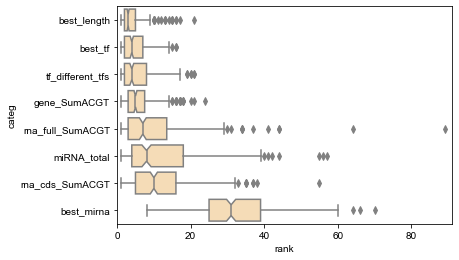

In [33]:
sns.boxplot(
    y='categ',
    x='rank',
    data=toy[toy.index.str.contains('_[45]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index(),
    notch=True,
    order=toy[toy.index.str.contains('_[45]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index().groupby(
        ['categ'])['rank'].median().sort_values().index,
    color='navajowhite'
)



plt.xlim(0, toy.max().max()+2)



if save_images:
    export.export_image(
        '{}/m_y.pdf'.format(out_folder))

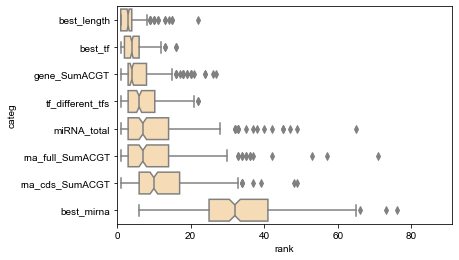

In [34]:
sns.boxplot(
    y='categ',
    x='rank',
    data=toy[toy.index.str.contains('_[67]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index(),
    notch=True,
    order=toy[toy.index.str.contains('_[67]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index().groupby(
        ['categ'])['rank'].median().sort_values().index,
    color='navajowhite'
)



plt.xlim(0, toy.max().max()+2)



if save_images:
    export.export_image(
        '{}/o_y.pdf'.format(out_folder))

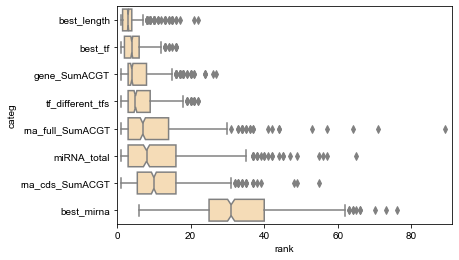

In [35]:
sns.boxplot(
    y='categ',
    x='rank',
    data=toy[toy.index.str.contains('_[4567]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index(),
    notch=True,
    order=toy[toy.index.str.contains('_[4567]_vs_[23]')].stack().to_frame('rank').rename_axis(['condition', 'categ']).reset_index().groupby(
        ['categ'])['rank'].median().sort_values().index,
    color='navajowhite'
)



plt.xlim(0, toy.max().max()+2)



if save_images:
    export.export_image(
        '{}/mo_y.pdf'.format(out_folder))